In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import IndexLocator
from datetime import date

# pode precisar executar para acessar o arquivo no drive
#from google.colab import drive
#drive.mount('/content/drive')

In [18]:
#Exportação de espumantes
dados_exp_espumante = pd.read_csv(r'tipos_de_vinhos\ExpEspumantes.csv', sep=';', encoding='UTF-8')
dados_exp_suco = pd.read_csv(r'tipos_de_vinhos\ExpSuco.csv', sep=';', encoding='UTF-8')
dados_exp_uva_fresca = pd.read_csv(r'tipos_de_vinhos\ExpUva_fresca.csv', sep=';', encoding='UTF-8')
dados_exp_vinho_mesa = pd.read_csv(r'tipos_de_vinhos\ExpVinho_mesa.csv', sep=';', encoding='UTF-8')

# Descrição colunas
### ano (2023) representa a quantidade em kg exportada
### ano com.1 (2023.1) representa o valor em dólar exportado


In [19]:
dados_exp_espumante.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,44
1,2,Alemanha,0,0,0,0,0,0,0,0,...,1003,5466,2388,14767,142,265,1164,6560,162,1542
2,3,Angola,0,0,0,0,0,0,0,0,...,1007,3615,24,38,0,0,26383,141588,56242,315073
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,7,34,32,328,10,82,65,146,24,100
4,5,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tratamento manual dos dados (exemplo)

In [20]:
'''#Excluindo coluna Id
dados_vinicula_tratado = dados_exp_espumante.drop(columns='Id')
#Transformando coluna País em indice
dados_vinicula_tratado = dados_vinicula_tratado.set_index('País')
dados_vinicula_tratado.head()
#gera lista das colunas
colunas_valor_exportacao = dados_vinicula_tratado.columns[dados_vinicula_tratado.columns.str.contains('\.')]
colunas_kg_exportacao = dados_vinicula_tratado.columns[~dados_vinicula_tratado.columns.str.contains('\.')]
dados_vinicula_valor = dados_vinicula_tratado[colunas_valor_exportacao]
dados_vinicula_valor.columns = colunas_kg_exportacao
dados_vinicula_kg = dados_vinicula_tratado[colunas_kg_exportacao]'''

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\jacom\AppData\Local\Temp\ipykernel_21216\301195523.py:1: SyntaxWarning: invalid escape sequence '\.'
  '''#Excluindo coluna Id


"#Excluindo coluna Id\ndados_vinicula_tratado = dados_exp_espumante.drop(columns='Id')\n#Transformando coluna País em indice\ndados_vinicula_tratado = dados_vinicula_tratado.set_index('País')\ndados_vinicula_tratado.head()\n#gera lista das colunas\ncolunas_valor_exportacao = dados_vinicula_tratado.columns[dados_vinicula_tratado.columns.str.contains('\\.')]\ncolunas_kg_exportacao = dados_vinicula_tratado.columns[~dados_vinicula_tratado.columns.str.contains('\\.')]\ndados_vinicula_valor = dados_vinicula_tratado[colunas_valor_exportacao]\ndados_vinicula_valor.columns = colunas_kg_exportacao\ndados_vinicula_kg = dados_vinicula_tratado[colunas_kg_exportacao]"

## Função para tratar os dados

In [21]:
def gera_tabelas_valor_e_kg(dados):
  dados_tratados = dados.drop(columns='Id')
  dados_tratados = dados_tratados.set_index('País')
  colunas_valor_exportacao = dados_tratados.columns[dados_tratados.columns.str.contains('\.')]
  colunas_kg_exportacao = dados_tratados.columns[~dados_tratados.columns.str.contains('\.')]
  dados_vinicula_valor = dados_tratados[colunas_valor_exportacao]
  dados_vinicula_valor.columns = colunas_kg_exportacao
  dados_vinicula_kg = dados_tratados[colunas_kg_exportacao]
  return dados_vinicula_valor, dados_vinicula_kg

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\jacom\AppData\Local\Temp\ipykernel_21216\1675511209.py:4: SyntaxWarning: invalid escape sequence '\.'
  colunas_valor_exportacao = dados_tratados.columns[dados_tratados.columns.str.contains('\.')]
C:\Users\jacom\AppData\Local\Temp\ipykernel_21216\1675511209.py:5: SyntaxWarning: invalid escape sequence '\.'
  colunas_kg_exportacao = dados_tratados.columns[~dados_tratados.columns.str.contains('\.')]


# Usando a função para tratar os dados (exemplo)
- dados_vinicula_valor:
- dados_vinicula_kg

In [22]:
exp_espumante_valor, exp_espumante_kg = gera_tabelas_valor_e_kg(dados_exp_espumante)
exp_suco_valor, exp_suco_kg = gera_tabelas_valor_e_kg(dados_exp_suco)
exp_uva_fresca_valor, exp_uva_fresca_kg = gera_tabelas_valor_e_kg(dados_exp_uva_fresca)
exp_vinho_mesa_valor, exp_vinho_mesa_kg = gera_tabelas_valor_e_kg(dados_exp_vinho_mesa)

In [23]:
dados_exp_uva_fresca

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,30.0,44.0,152.0,0.0,0.0,0.0,0.0,30,136
1,2,"Alemanha, República Democrática",0.0,0.0,135.0,103.0,0.0,0.0,0.0,0.0,...,1863097.0,3480290.0,1371694.0,2791556.0,1461590.0,2569452.0,559012.0,1213303.0,1701887,4101648
2,3,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,Antígua e Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,190.0,580.0,304.0,1013.0,437.0,1349.0,253.0,999.0,260,1173
4,5,Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,167731.0,271231.0,32325.0,95999.0,2818.0,14671.0,12224.0,53675.0,2234,19382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,Uruguai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81440.0,98329.0,68196.0,58419.0,95722.0,155667.0,194634.0,336671.0,281594,547227
130,131,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,73.0,73.0,133.0,80.0,244.0,31,88
131,132,Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
132,133,Vietnã,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,49.0,100.0,271.0,60.0,260.0,63,177


In [24]:
exp_uva_fresca_kg

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,44.0,0.0,0.0,30
"Alemanha, República Democrática",0.0,135.0,0.0,0.0,3840.0,0.0,0.0,360.0,11700.0,21500.0,...,1649514.0,3277187.0,2384112.0,3353831.0,2870420.0,1863097.0,1371694.0,1461590.0,559012.0,1701887
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15.0,75.0,0.0,0.0,0.0,0
Antígua e Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,65.0,190.0,304.0,437.0,253.0,260
Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61200.0,0.0,0.0,14725.0,167731.0,32325.0,2818.0,12224.0,2234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28960.0,108040.0,86816.0,104368.0,187316.0,81440.0,68196.0,95722.0,194634.0,281594
Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,73.0,80.0,31
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
exp_uva_fresca_valor

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,152.0,0.0,0.0,136
"Alemanha, República Democrática",0.0,103.0,0.0,0.0,3293.0,0.0,0.0,306.0,11905.0,26640.0,...,3524291.0,6532957.0,5161080.0,6730502.0,5833592.0,3480290.0,2791556.0,2569452.0,1213303.0,4101648
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33.0,145.0,0.0,0.0,0.0,0
Antígua e Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,164.0,580.0,1013.0,1349.0,999.0,1173
Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,140760.0,0.0,0.0,28615.0,271231.0,95999.0,14671.0,53675.0,19382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73671.0,177749.0,203228.0,253089.0,301600.0,98329.0,58419.0,155667.0,336671.0,547227
Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.0,133.0,244.0,88
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Transfomando a tabela qualitativa em categorica para uma melhor avaliação e e consulta

In [36]:
top_5 = exp_espumante_kg.T.sum().sort_values(ascending=False).head()
top_5.index
exp_espumante_kg_melt = exp_espumante_kg.loc[top_5.index].reset_index().melt(id_vars=['País'], value_vars=exp_espumante_kg.columns)
exp_espumante_kg_melt.columns = ['país', 'ano', 'Litro']
exp_espumante_kg_melt['ano'] = exp_espumante_kg_melt['ano'].astype(int)
exp_espumante_kg_melt

,país,ano,Litro
0,Estados Unidos,1970,0
1,Paraguai,1970,415
2,Reino Unido,1970,0
3,Bolívia,1970,36
4,Angola,1970,0
...,...,...,...
265,Estados Unidos,2023,255198
266,Paraguai,2023,64662
267,Reino Unido,2023,16057
268,Bolívia,2023,11410


In [33]:
exp_espumante_kg_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pais    270 non-null    object
 1   ano     270 non-null    int64 
 2   Litro   270 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.5+ KB


In [80]:
paises_exportadores = exp_espumante_kg_melt.query('(ano >= 2005) & (ano <= 2019) & (país in ["Paraguai", "Estados Unidos", "Reino Unido", "Bolívia"])')

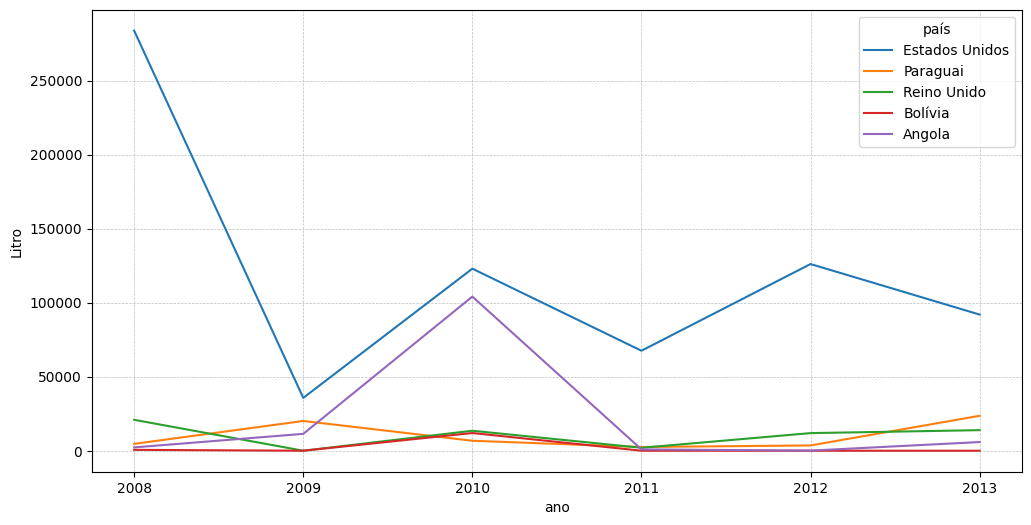

In [83]:
dados_filtrados = exp_espumante_kg_melt.query("(ano >= 2008) & (ano <= 2013)")
plt.figure(figsize=(12, 6))
axis = sns.lineplot(data=dados_filtrados, x="ano", y="Litro", hue="país")
plt.grid(linestyle='--', linewidth=0.5, color=(0.75,0.75,0.75))

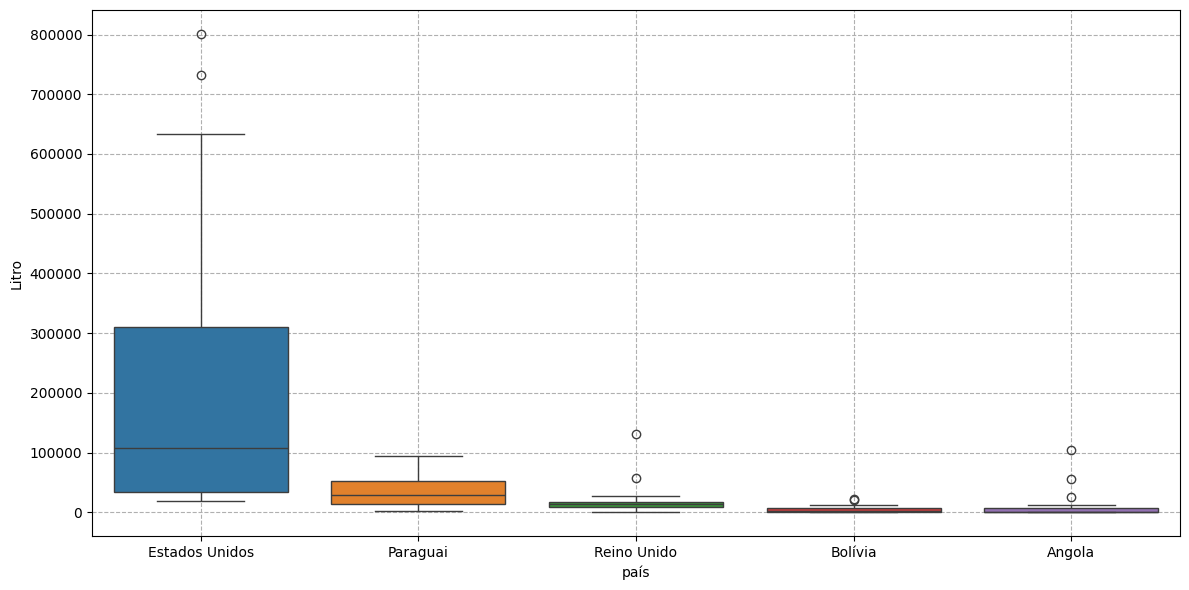

In [101]:
dados_filtrados = exp_espumante_kg_melt.query("(ano >= 2008) & (ano <= 2023)")
plt.figure(figsize=(12, 6))
axis = sns.boxplot(data=dados_filtrados, x="país", y="Litro", hue="país")
plt.grid(linestyle='--')


plt.tight_layout()

plt.show()

In [93]:
dados_filtrados[['país', 'Litro']].describe()

,Litro
count,10.000000
mean,37929.500000
std,87180.545387
min,0.000000
25%,1001.250000
50%,8015.000000
75%,20684.750000
max,283760.000000


In [95]:
dados_filtrados['Litro'].median()

np.float64(8015.0)